In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:56<00:00, 23.1MB/s]
100% 1.06G/1.06G [00:56<00:00, 20.2MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [5]:
#generators
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
#Normalize
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 75s 105ms/step - loss: 1.4842 - accuracy: 0.5951 - val_loss: 0.6115 - val_accuracy: 0.6724
Epoch 2/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5660 - accuracy: 0.7113 - val_loss: 0.4919 - val_accuracy: 0.7652
Epoch 3/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5008 - accuracy: 0.7566 - val_loss: 0.6050 - val_accuracy: 0.7026
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4390 - accuracy: 0.7987 - val_loss: 0.4484 - val_accuracy: 0.7884
Epoch 5/10
625/625 [==============================] - 68s 107ms/step - loss: 0.3822 - accuracy: 0.8319 - val_loss: 0.4538 - val_accuracy: 0.7918
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3137 - accuracy: 0.8654 - val_loss: 0.4707 - val_accuracy: 0.8016
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2554 - accuracy: 0.8924 - val_loss: 0.6327 - val_ac

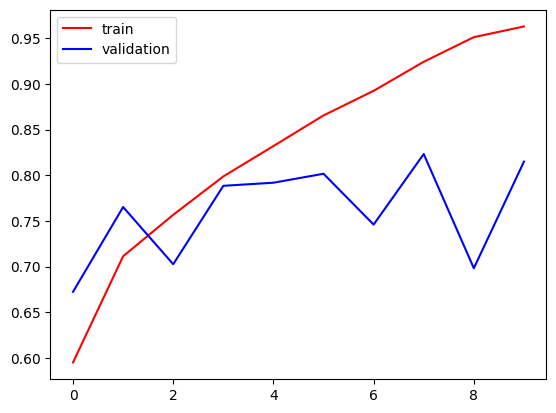

In [11]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

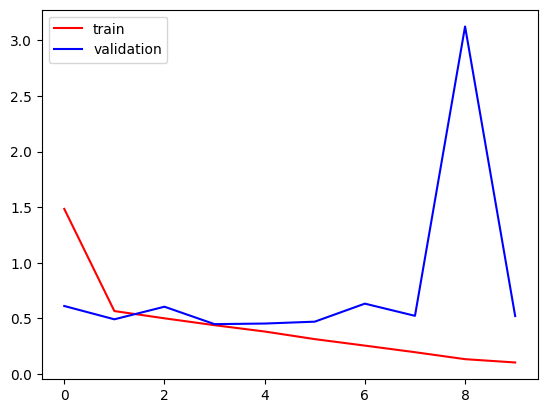

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [13]:
import cv2

In [14]:
test_img = cv2.imread('/content/2560px-A-Cat.jpg')

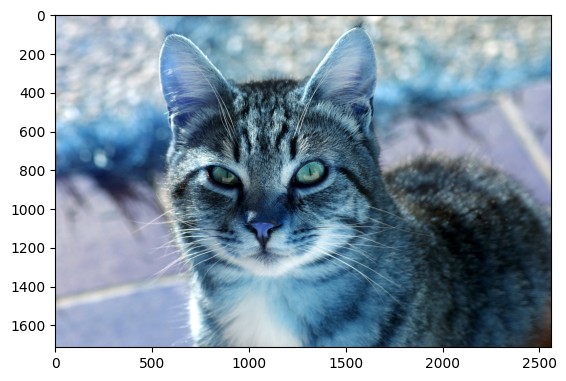

In [15]:
plt.imshow(test_img)

In [20]:

test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
result = model.predict(test_input)
if result[0][0]  > 0.5:
  print("Dog")
else:
  print("Cat")


1/1 [==============================] - 0s 18ms/step
Cat
